# <span style="color:#0b486b">SIT 112 - Data Science Concepts - Assignment 2</span>

---
Lecturer: Truyen Tran | truyen.tran@deakin.edu.au<br />
Assistant: Trang Pham | phtra@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC 3216, Australia.

### <span style="color:#0b486b">Due: 5pm, 15th September 2016</span>
---

## <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete Assignment 2. Some sections have been partially completed  to help you get started. **The total marks for this notebook is 200**.

* Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Assignment2_instructions.pdf*  to know what else you need to complete for this assignment as well submission instruction. <br><br>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br><br>


### submission

You are required to submit **five** files: <br><br>

* The source of your solution notebook: **[yourID]_assignment2_solution.ipynb**
* An exported version of your output: **[yourID]_assignment2_output.html**  
* Three json data files storing tweets collected for three keywords, named **[yourID]_w1.json**, **[yourID]_w2.json**, **[yourID]_w3.json** where **w1, w2, w3** are the three keywords you selected.
    


As you go through this notebook:

* markdown cells marked with **Note** mean description sections.
* markdown cells marked with **Instruction** mean the instructions given to you to complete the designated section.

## <span style="color:#0b486b">Part 1: Crawling and Storing Tweet Data for Australia</span>


The first part of the assignment examines your skills and knowledge to query tweets and store them in json files. For **each** selected keyword, your tasks are:

* Crawl all tweets contain this keyword written in English and geocoded within Australia.
* Store the tweets collected into json files.

***Follow the instructions below to complete your task***.

**Note**: The following packages will be required for this assignment. If you need to import more packages, you might append them to the end of the following cell.

In [1]:
'''
Import packages needed for processing
'''
import re
import json
import numpy as np
from collections import Counter
from TwitterAPI import TwitterAPI # in case you need to install this package, see practical 6
from sklearn.cluster import KMeans

import requests

# disabling urllib3 warnings
requests.packages.urllib3.disable_warnings()

import matplotlib.pyplot as plt
%matplotlib inline

'''
If you need add any additional packages, then add them below
'''

'\nIf you need add any additional packages, then add them below\n'

**Instruction 1.1**. Enter your selected keywords to the variable **keywords** below.

[**Total mark: 3**]

In [2]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Enter the three keywords you selected to the variable keywords below
e.g. keywords = ["abc", "def", "ghi"]
'''

keywords = ["computer", "animal", "movie"]

**Instruction 1.2**. Before you can perform a query to Twitter API, you need to supply authentication information. Practical sessions 6 and 7 show you how to obtain this information. **Your task is to supply the authentication information in the cell below**.

**Note**: You might decide to regenerate this authentication from the pracs if you would like too. <span style="color:red">After the assignment has been marked, you are strongly recommended to regenerate this authentication information from your account to maintain your privacy.</span> 


[**Total mark: 10**]

In [3]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# Twitter API credentials 
CONSUMER_KEY = "NiQt1qfwwjMl2HqF8OH12uPgT"
CONSUMER_SECRET = "YGYs7e1Da11IVk9kvW9dbe5d7upYRaX94N7sIDb2Zo92Bm0xQG"
OAUTH_TOKEN = "392465376-mj3xpiZlfuTIWg3iSe0w1bQKtYh0MsFBd2R0aXf2"
OAUTH_TOKEN_SECRET = "RxEhXSM4iqwOjsMMqhzRf8VmHrxg5YJI6YwCgWzo9l8HE"

# Authenticating with your application credentials
api = TwitterAPI(CONSUMER_KEY,
                 CONSUMER_SECRET,
                 OAUTH_TOKEN,
                 OAUTH_TOKEN_SECRET) 

**Note**: As you have learned from the pracical sessions, to perform a query from Twitter API for a particular geo-coded location you need a center point and a radius. The center point is specified by its (latitude,longitute) pair. **The information below has been given to you to perform the query in the subsequent tasks**. **Do not** modify these variables.

In [4]:
# geo coordinations of the desired place
AUS_LAT = -24.396176
AUS_LONG = 133.247614
AUS_RADIUS = 1500

**Instruction 1.3**. For each keyword, you are required to crawl at least **500** tweets using the Twitter API. However, as you have learned from the practical sessions, each query will return a maximum of only **100** tweets. Therefore, subsequent query **must** use the maximum Tweet ID from the previous batch to crawl the next lot.

The following function, called ***retrieve_tweets()***, has been **partially** implemented to automatically download tweets until it reaches the maximum number of tweets needed. 

For example, a function call
```
retrieve_tweets(api,'car',50,500)
```
will attempt to crawl a total of at least 500 tweets that contains the word 'car'. Within each single query, it will attempt to obtain 50 tweets. For this assignment, by default we will query within Australian region specified by the latitute, longitude and radius specified before.

**Your task is to walk through this function and enter your own codes where instructed to complete the function**.

[**Total mark: 14**]

In [5]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
You will be required to insert your own codes to complete this function. 
Walk through this function and enter your own codes where instructed.
'''
def retrieve_tweets(api, keyword, batch_count, total_count):
    """
    collects tweets using the Twitter search API
    
    api:         Twitter API instance
    keyword:     search keyword
    batch_count: maximum number of tweets to collect per each request
    total_count: maximum number of tweets in total
    """
    
    # the collection of tweets to be returned
    tweets = []
    
    # the number of tweets within a single query
    batch_count = str(batch_count)
    
    '''
    You are required to insert your own code where instructed to perform the first query to Twitter API.
    Hint: revise the practical session on Twitter API on how to perform query to Twitter API.
    '''
    # per the first query, to obtain max_id_str which will be used later to query sub
    resp = api.request(
        'search/tweets',
        { 
            'q': keyword,
            'count': batch_count,
            'lang': 'en',
            'result_type': 'recent',
            'geocode': '{},{},{}mi'.format(AUS_LAT, AUS_LONG, AUS_RADIUS)
        }
    )
    
    # store the tweets in a list
    tweets += resp.json()['statuses']
    
    # find the max_id_str for the next batch
    ids = [tweet['id'] for tweet in tweets]
    max_id_str = str(min(ids))

    # loop until as many tweets as total_count is collected
    number_of_tweets = len(tweets)
    while number_of_tweets < total_count:
        print("{} tweets are collected for keyword {}. Last tweet created at {}".format(number_of_tweets, 
                                                                                        keyword, 
                                                                                        tweets[number_of_tweets - 1]['created_at']))
        resp = api.request(
            'search/tweets',
            {
                'q': keyword,
                'count': batch_count,
                'lang': 'en',
                'result_type': 'recent',
                'max_id': max_id_str,
                'geocode': '{},{},{}mi'.format(AUS_LAT, AUS_LONG, AUS_RADIUS)
            }
        )

        tweets += resp.json()['statuses']
        ids = [tweet['id'] for tweet in tweets]
        max_id_str = str(min(ids))
        number_of_tweets = len(tweets)
        
    print("{} tweets are collected for keyword {}. Last tweet created at {}".format(number_of_tweets, 
                                                                                    keyword, 
                                                                                    tweets[number_of_tweets - 1]['created_at']))
    return tweets

**Instruction 1.4**. After having defined the ***retrieve_tweets()*** function above, you are now ready to use this function to collect your tweets. Your task is to write the code to perform three function calls, each corresponds to one keyword. And, you are required to collect **500** tweets for each key word.

[**Total mark: 12**]

In [6]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Your task is to write the code to perform three function calls, each corresponds to one keyword. 
And, you are required to collect 500 tweets for each key word.
'''

# Collecting the tweets for three assigned keywords, 
# Your function call should look like this:  retrieve_tweets(api,'keyword',single_count,total_count)

k1_tweets = retrieve_tweets(api, keywords[0], 100, 500)
k2_tweets = retrieve_tweets(api, keywords[1], 100, 500)
k3_tweets = retrieve_tweets(api, keywords[2], 100, 500)

# PLEASE NOTE THAT IF YOU RUN THIS CELL, IT MIGHT TAKE A WHILE TO DOWNLOAD ALL THE TWEETS REQUIRED.
# MAKE SURE THAT YOU WAIT UNTILL THE CELL FINISHES RUNNING.

100 tweets are collected for keyword computer. Last tweet created at Thu Sep 07 13:23:51 +0000 2017
200 tweets are collected for keyword computer. Last tweet created at Thu Sep 07 08:45:47 +0000 2017
300 tweets are collected for keyword computer. Last tweet created at Thu Sep 07 02:09:40 +0000 2017
400 tweets are collected for keyword computer. Last tweet created at Wed Sep 06 14:48:48 +0000 2017
500 tweets are collected for keyword computer. Last tweet created at Wed Sep 06 08:05:33 +0000 2017
100 tweets are collected for keyword animal. Last tweet created at Thu Sep 07 19:54:26 +0000 2017
200 tweets are collected for keyword animal. Last tweet created at Thu Sep 07 13:25:43 +0000 2017
299 tweets are collected for keyword animal. Last tweet created at Thu Sep 07 10:27:15 +0000 2017
399 tweets are collected for keyword animal. Last tweet created at Thu Sep 07 07:19:16 +0000 2017
499 tweets are collected for keyword animal. Last tweet created at Thu Sep 07 05:17:55 +0000 2017
599 tweets

**Instruction 1.5**. To verify the downloading process, write your code to print out the number of tweets which has been collected for each keyword.

[**Total mark: 3**]

In [7]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your code to print the number of tweets have been collected for each keyword
'''
# INSERT YOUR CODE HERE
print(len(k1_tweets))
print(len(k2_tweets))
print(len(k3_tweets))

500
599
599


**Note:** Each tweet is stored in a dictionary where its keywords are fields in the tweet and values are the information of the fields. The cell below print the type of a tweet.

In [8]:
# Data type of tweets
print(type(k1_tweets[0]))

<class 'dict'>


**Instruction 1.6**.  To examine what the tweets look like, in the cell below write your code to print out all fields of the first tweet in `k1_tweets` and print out the text of the first tweet collected for each keyword.

[**Total mark: 6**]

In [9]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your code to print out all fields of the first tweet
Hint: You might want to use method keys() of the dictionary
'''
# INSERT YOUR CODE HERE
print(k1_tweets[0].keys())

'''
Write your code to print out the text of the first  tweet collected for each keyword.
'''

print("\nThe text of the first tweet for \"{}\":\n".format(keywords[0]))
# INSERT YOUR CODE HERE
print(k1_tweets[0]['text'])

print('\nThe text of the first tweet for \"{}\":\n'.format(keywords[1]))
# INSERT YOUR CODE HERE
print(k2_tweets[0]['text'])

print('\nThe text of the first tweet for \"{}\":\n'.format(keywords[2]))
# INSERT YOUR CODE HERE
print(k3_tweets[0]['text'])

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

The text of the first tweet for "computer":

Map of Computer Science - YouTube https://t.co/qy6W73Kmdr

The text of the first tweet for "animal":

Increasing music &amp; animal therapy :) https://t.co/3XGnxGtdKB

The text of the first tweet for "movie":

Everything that I am seeing from this movie is perfection. https://t.co/ds4Mm3jdTs


**Note**. When collecting data from the Internet, such as Twitter, it is important that we store the data collected in an appropriate format for later data analysis task. We have learned that json is a poplular lightweight data format that can be handy to store unstructured data. For example, with NoSQL we can directly query these files in a 'scaling out' fashion. These technologies are representative features of Big Data Analytics.

The following function has been designed for you to save an object which is a list of dictionaries (such as k1_tweets variable) to a json file. **You will need this function for your next task**.

In [10]:
def save_to_json(obj, filename):
    """
    saves a list of dictionaries into a json file
    
    obj: list of dictionaries
    filename: filename
    """
    with open(filename, 'w') as fp:
        json.dump(obj, fp, indent=4, sort_keys=True)   

**Instruction 1.7**. Use the function ***save_to_json()*** defined above, for each collection of tweets you have crawled for each keyword, save them into a file named **w.json** where **w** is the keyword.

For example, if your keywords are 'w1', 'w2' and 'w3', then your code must generate three file w1.json, w2.json and w3.json. **Important: you must submit these files together with your notebook solution**.

[**Total mark: 12**]

In [11]:
k1_filename = 'group2_computer.json'
k2_filename = 'group2_animal.json'
k3_filename = 'group2_movie.json'

In [12]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Use the save_to_json() function defined above, for the collection of tweets 
you have crawled for each keyword, save them into a file named w.json where w is the keyword.
'''
# saving the tweets in three json files, one for each keyword
#INSERT YOUR CODE HERE

save_to_json(k1_tweets, k1_filename)
save_to_json(k2_tweets, k2_filename)
save_to_json(k3_tweets, k3_filename)

###                                     END OF PART 1
----

## Part 2: Data Analytics

The second part of this assignment will examine your skills and knowlege in data manipulation and analysis tasks. It includes three main components:

**Part 2A**. For each keyword, you will be required to load the tweets from your saved json files (from Part 1) and filter out all tweets that are too short.

**Part 2B**. Using your knowledge from practical session 5 to 7 to construct the term-by-document matrix for the tweets and perform visualisation tasks to understand them.

**Part 2C**. Applying the Kmeans clustering algorithm to cluster your tweets and report the clustering results.

***Follow the instructions below to complete your assigned tasks***.

### Part 2A: Load and Filter Tweets from Files

**Instruction 2.1**. The following function, named ***read_json_file()***, has been partially implemented to load data from a json file. This function will be used later on to load three json files you have saved from Part 1. Your task is to insert your own code where instructed to complete this function.

[**Total mark: 3**]

In [13]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Insert your own code where instructed to complete this function
'''
def read_json_file(filename):
    """
    reads from a json file and saves the result in a list named data
    """
    with open(filename, 'r') as fp:
        # INSERT THE MISSING PIECE OF CODE HERE
        data = json.load(fp)
    return data     

**Instruction 2.2**. Now use the ***read_json_file()*** function defined above, write three function calls to load data from three json files you have saved from Part 1.

[**Total mark: 9**]

In [14]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write three function calls to load data from three json files you have saved from Part 1.
'''

k1_tweets = read_json_file(k1_filename)
k2_tweets = read_json_file(k2_filename)
k3_tweets = read_json_file(k3_filename)

**Instruction 2.3**. To examine the number of tweets loaded from your data files, write your code to print out the number of tweets containes in three variables: ***k1_tweets, k2_tweets*** and ***k3_tweets***.

[**Total mark: 3**]

In [15]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your code to print out the number of tweets containes in three variables: k1_tweets, k2_tweets 
and k3_tweets
'''
#INSERT YOUR CODE HERE

print(len(k1_tweets))
print(len(k2_tweets))
print(len(k3_tweets))

500
599
599


**Note**. When analysing tweets and text documents in general, an important analytics skill is to pre-process and filter the data into the form that one can start to apply analytics methods to extract knowledge. 

Tweets that are too short might not be useful for analysis. We define that tweets with length smaller than 50 characters are short and should be remove. 

The following lines of code shows you how to **remove** all tweets that have **less than 50** characters in the variable ***k1_tweets*** to result the new variable ***k1_tweets_filtered***.

In [16]:
'''
Remove all tweets which have less than 50 characters for variable k1_tweets
'''

def is_short_tweet(tweet):
    return len(tweet['text']) < 50

k1_tweets_filtered = [tweet for tweet in k1_tweets if not is_short_tweet(tweet)]
print(len(k1_tweets), len(k1_tweets_filtered))

500 484


**Instruction 2.4**. Now, apply similar technique for k1_tweets variable shown above, write your codes to remove all tweets that have less than 50 characters in variables ***k2_tweets*** and ***k3_tweets*** and store the results in the new variables ***k2_tweets_filtered*** and ***k3_tweets_filtered*** respectively.

[**Total mark: 6**]

In [17]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to remove all tweets which have less than 50 characters in variables 
k2_tweets and k3_tweets and store the results in the new variables k2_tweets_filtered 
and k3_tweets_filtered respectively
'''

k2_tweets_filtered = [tweet for tweet in k2_tweets if not is_short_tweet(tweet)]
k3_tweets_filtered = [tweet for tweet in k3_tweets if not is_short_tweet(tweet)]

print(len(k2_tweets), len(k2_tweets_filtered))
print(len(k3_tweets), len(k3_tweets_filtered))

599 583
599 558


**Instruction 2.5**. For each keyword, print out the number of tweets that have been removed.

[**Total mark: 3**]

In [18]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
For each keyword, print out the number of tweets that have been removed.
'''

# INSERT YOUR CODE HERE

k1_removed = len(k1_tweets) - len(k1_tweets_filtered)
k2_removed = len(k2_tweets) - len(k2_tweets_filtered)
k3_removed = len(k3_tweets) - len(k3_tweets_filtered)

print(k1_removed, k2_removed, k3_removed)

16 16 41


**Instruction 2.6**. To examine what the tweets look like after being loaded from the data files and filtered, in the cell below write your code to print out the first **5** tweets for each keyword. 

You **must** use the variables ***k1_tweets_filtered, k2_tweets_filtered*** and ***k3_tweets_filtered*** which have stored the data after the filtering process for this task.

[**Total mark: 6**]

In [19]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your code to print out the first 5 tweets for each keyword.
You must use the variables k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered 
which have stored the data after the filtering process for this task.

Hint: Using tweet['text'] for tweet in k1_tweets_filtered
'''

def first_five_tweets(array):
    for i in range(5):
        print(array[i]['text'], "\n")

print('The first 5 tweets for \"{}\":\n'.format(keywords[0]))
# INSERT YOUR CODE HERE
first_five_tweets(k1_tweets_filtered)

print('\nThe first 5 tweets for \"{}\":\n'.format(keywords[1]))
# INSERT YOUR CODE HERE 
first_five_tweets(k2_tweets_filtered)

print('\nThe first 5 tweets for \"{}\":\n'.format(keywords[2]))
# INSERT YOUR CODE HERE
first_five_tweets(k3_tweets_filtered)

The first 5 tweets for "computer":

Map of Computer Science - YouTube https://t.co/qy6W73Kmdr 

RT @TheDealer1228: @THNDRTHF True Sandpeople fans react quick or they don't react at all (I also saw the tweet as I sat down at my computer… 

@THNDRTHF True Sandpeople fans react quick or they don't react at all (I also saw the tweet as I sat down at my computer, so....) 

@lyndysambora @EwelinaTequila The imagination just runs wild!  Which is good for me coz I'm about to hit the computer to do some writing 🔥🤞🏻 

Police Report Indicates Imran Awan Planted Computer? https://t.co/BdvFtOco16 


The first 5 tweets for "animal":

Increasing music &amp; animal therapy :) https://t.co/3XGnxGtdKB 

Charge into Museum Zoo these school holidays for animal themed activities and the special exhibit… https://t.co/JcuODDT1pV 

RT @CatherineKingMP: Labor is fighting to make animal testing a thing of the past. Govt needs to close the loophole in their legislation @B… 

@Natureissoscary I wish I could pat t

### Part 2B: Constructing Term-by-Document Matrix

As we have learned in our class, in text analytics and in general dealing with unstructured data, to start perform **computational** tasks such as computing the distance between two documents, we need to represent them in **numerical** formats. A popular technique we have learned is the bag-of-word representation and the term-by-document matrix, also known as the vector-space model.

This part of the assignment will require you to construct the term-by-document matrix for the tweets stored in three variables ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered***.

**Note.** Tweets are often not neat as you might have seen from early tasks. As tweet such as this 
```
Happy shopping👗👚👠👜 (with Vivi and Irmalia at @infomog) — https://t.co/fUGO9Eex1r
```
might contain non-ASCII characters, emoticon, punctuations, etc. Building a bag-of-word representation **without** pre-processing the data can be ineffective. 

The following function ***pre_process()*** has been designed to preprocess the data for you.

In [20]:
def remove_non_ascii(s): return "".join(i for i in s if ord(i)<128)
def pre_process(doc):
    """
    pre-processes a doc
      * Converts the tweet into lower case,
      * removes the URLs,
      * removes the punctuations
      * tokenizes the tweet
      * removes words less that 3 characters
    """
    
    doc = doc.lower()
    # getting rid of non ascii codes
    doc = remove_non_ascii(doc)
    
    # replacing URLs
    url_pattern = "http://[^\s]+|https://[^\s]+|www.[^\s]+|[^\s]+\.com|bit.ly/[^\s]+"
    doc = re.sub(url_pattern, 'url', doc) 

    punctuation = r"\(|\)|#|\'|\"|-|:|\\|\/|!|\?|_|,|=|;|>|<|\.|\@"
    doc = re.sub(punctuation, ' ', doc)
    
    return [w for w in doc.split() if len(w) > 2]

**Note**. For example, the following code will display the first tweet stored in the variable ***k1_tweets_filtered*** (for the first keyword) before and after it has been pre-processed.

In [21]:
tweet_k1 = k1_tweets_filtered[0]['text']
tweet_k1_processed = pre_process(tweet_k1)

print(tweet_k1)
# tweet_k1_processed is now a list of words. 
# We use ' '.join() method to join the list to a string.
print(' '.join(tweet_k1_processed))

Map of Computer Science - YouTube https://t.co/qy6W73Kmdr
map computer science youtube url


**Instruction 2.7**. Use the example above, write your code to display the **first** tweets stored in the variables ***k2_tweets_filtered*** and ***k2_tweets_filtered*** before and after they have been pre-processed using the function ***pre_process()*** supplied earlier.

[**Total mark: 4**]

In [22]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Use the example above, write your code to display the first tweets stored in 
the variables k2_tweets_filtered and k3_tweets_filtered before and after they 
have been pre-processed using the function pre_process() supplied earlier.
'''

# INSERT YOUR CODE HERE

tweet_k2 = k2_tweets_filtered[0]['text']
tweet_k2_processed = pre_process(tweet_k2)

tweet_k3 = k3_tweets_filtered[0]['text']
tweet_k3_processed = pre_process(tweet_k3)

# INSERT YOUR CODE HERE

print(tweet_k2)
print(' '.join(tweet_k2_processed))

print(tweet_k3)
print(' '.join(tweet_k3_processed))

Increasing music &amp; animal therapy :) https://t.co/3XGnxGtdKB
increasing music &amp animal therapy url
Everything that I am seeing from this movie is perfection. https://t.co/ds4Mm3jdTs
everything that seeing from this movie perfection url


**Note**. The following piece of codes will pre-process and clean up all tweets stored in the variable ***k1_tweets_filtered*** using the function ***pre_process()*** to result in the new filtered and pre-procecess variable named ***k1_tweets_processed***.

In [23]:
k1_tweets_processed = [pre_process(tweet['text']) for tweet in k1_tweets_filtered]

**Instruction 2.8**. Simlilarly, write your code to pre-process and clean up all tweets stored in the variable ***k2_tweets_filtered*** and ***k3_tweets_filtered*** using the function ***pre_process()*** to result in the two new variables ***k2_tweets_processed*** and ***k3_tweets_processed***.

[**Total mark: 6**]

In [24]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Apply similar technique shown above, write your code to pre-process and clean up all tweets 
stored in the variable k2_tweets_filtered and k3_tweets_filtered using the 
function pre_process() to result in the two new variables k2_tweets_processed 
and k3_tweets_processed.
'''

k2_tweets_processed = [pre_process(tweet['text']) for tweet in k2_tweets_filtered]
k3_tweets_processed = [pre_process(tweet['text']) for tweet in k3_tweets_filtered]

**Instruction 2.9**. Now, write your code to print out the **first 5 processed tweets** for each keyword *(the processed tweets are stored in **k1_tweets_processed**, **k2_tweets_processed** and **k3_tweets_processed**)*

[**Total mark: 7**]

In [25]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Now write your code to print out the first 5 processed tweets for each keyword.
Hint: Each tweet in tweets_processed is now a list of words, not a string. 
      To print a string, you might need to use ' '.join(tweet), 
      when tweet is a processed tweet

'''

print('The first 5 processed tweets for k1_tweets_processed:')
# INSERT YOUR CODE HERE
for i in range(5):
    print(k1_tweets_processed[i])

print('\nThe first 5 processed tweets for k2_tweets_processed:')
# INSERT YOUR CODE HERE
for i in range(5):
    print(k2_tweets_processed[i])

print('\nThe first 5 processed tweets for k3_tweets_processed:')
# INSERT YOUR CODE HERE
for i in range(5):
    print(k3_tweets_processed[i])

The first 5 processed tweets for k1_tweets_processed:
['map', 'computer', 'science', 'youtube', 'url']
['thedealer1228', 'thndrthf', 'true', 'sandpeople', 'fans', 'react', 'quick', 'they', 'don', 'react', 'all', 'also', 'saw', 'the', 'tweet', 'sat', 'down', 'computer']
['thndrthf', 'true', 'sandpeople', 'fans', 'react', 'quick', 'they', 'don', 'react', 'all', 'also', 'saw', 'the', 'tweet', 'sat', 'down', 'computer']
['lyndysambora', 'ewelinatequila', 'the', 'imagination', 'just', 'runs', 'wild', 'which', 'good', 'for', 'coz', 'about', 'hit', 'the', 'computer', 'some', 'writing']
['police', 'report', 'indicates', 'imran', 'awan', 'plantedcomputer', 'url']

The first 5 processed tweets for k2_tweets_processed:
['increasing', 'music', '&amp', 'animal', 'therapy', 'url']
['charge', 'into', 'museum', 'zoo', 'these', 'school', 'holidays', 'for', 'animal', 'themed', 'activities', 'and', 'the', 'special', 'exhibit', 'url']
['catherinekingmp', 'labor', 'fighting', 'make', 'animal', 'testing', '

**Note**. The following function ***construct_termdoc()*** has been implemented to construct the term-by-document matrix from a corpus of text data. **You will need this function for subsequent task**.

In [26]:
def construct_termdoc(docs, vocab=[]):
    """
    Construct a term-by-document-matrix
    
    docs: corpus
    vocab: pre-defined vocabulary
           if not supplied it will be automatically induced from the data
    
    returns the term-by-document matrix and the vocabulary of the passed corpus
    """
    
    # vocab is not passed
    if vocab == []:
        vocab = set()
        termdoc_sparse = []

        for doc in docs:       
            # computes the frequencies of doc
            doc_sparse = Counter(doc)    
            termdoc_sparse.append(doc_sparse)
            
            # update the vocab
            vocab.update(doc_sparse.keys())  

        vocab = list(vocab)
        vocab.sort()
    
    else:
        termdoc_sparse = []        
        for doc in docs:
            termdoc_sparse.append(Counter(doc))
            

    n_docs = len(docs)
    n_vocab = len(vocab)
    termdoc_dense = np.zeros((n_docs, n_vocab), dtype=int)

    for j, doc_sparse in enumerate(termdoc_sparse):
        for term, freq in doc_sparse.items():
            try:
                termdoc_dense[j, vocab.index(term)] = freq
            except:
                pass
            
    return termdoc_dense, vocab

**Note**. Now suppose that we would like to construct a term-by-document matrix for tweets collected for the **first keyword only**. The following piece of codes will do this by computing the term-by-document matrix and the vocabulary for tweets stored in **k1_tweets_processed**, print them out and visualise the corresponding term-by-document matrix stored in the variable ***k1_termdoc***. The corresponding vocabulary dictionary computed from this data will also be stored in the variable ***k1_vocab***.

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
$100 $130 $14 $16 $50


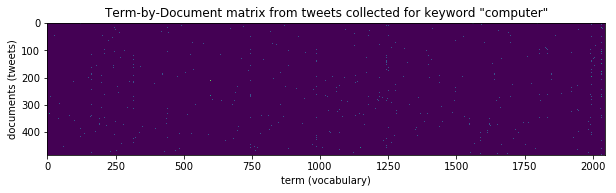

In [27]:
'''
compute the term-by-document matrix and the the dictionary from the collection of 
tweets collected for the first keyword
'''
k1_termdoc, k1_vocab = construct_termdoc(k1_tweets_processed)

# print out the term-by-document matrix
print(k1_termdoc)

# print out the first 5 vocabularies
print(' '.join(k1_vocab[:5]))  # print out only the first 5 vocabs

# visualise the term-by-document matrix
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k1_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[0]))

**Note**. Next, we would like to compute the pairwise distances between every two tweets. This will help us to see how similar tweets are. This is a computational task that would be *not* possible to do if we use the raw tweets.

However, with the term-by-document matrix, each tweet now is vector and corresponds to a row in the term-by-document matrix. Hence, we can use the distance between vectors to compute the distance between tweets. This is also known as the **vector space model** in information retrieval literature.

First, define the following function to compute the Euclidean distance between two vectors as we have learned from the class notes.

In [28]:
def Euclidean_distance(x,y):
    '''
    Compute the Euclidean distance between two vectors x and y
    '''
    dist = (np.array(x) - np.array(y)) * (np.array(x) - np.array(y))
    return np.sqrt(dist.sum())

**Note**. We then construct function that returns a distance matrix ***euclidean_distance_matrix*** whose element (i,j) stores the Eulidean distance between tweet i-th and i-jth. **You will need this function for subsequent task**.

In [29]:
def compute_euclidean_distance_matrix(termdoc):
    # obtain the number of tweets for this keyword
    n_tweets = termdoc.shape[0]

    # intialise the distance matrices and set all values to 0
    euclidean_distance_matrix = np.zeros([n_tweets, n_tweets], dtype=float)

    # compute the Euclidean distance matrix using the Euclidean_distance function()
    for i in range(n_tweets):
        for j in range(n_tweets):
            euclidean_distance_matrix[i,j] = Euclidean_distance(termdoc[i,:], termdoc[j,:])
    return euclidean_distance_matrix

**Note**. We can compute the distance matrix for **k1_termdoc** and then visualise this distance matrix using the following piece of codes.

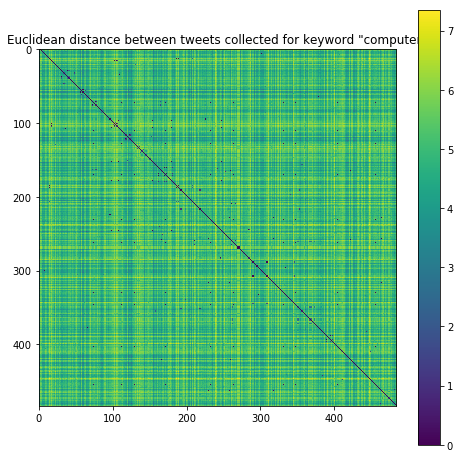

In [30]:
# compute the distance matrix for k1_termdom
k1_euclidean_distances = compute_euclidean_distance_matrix(k1_termdoc)

# Visualise the distance matrix for this keyword
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Euclidean distance between tweets collected for keyword \"{}\"".format(keywords[0]))
cax = ax.imshow(k1_euclidean_distances)
cbar = fig.colorbar(cax)

**Instruction 2.10**. Similar to the example above for the first keyword, your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for tweets stored in ***k2_tweets_processed***, print out the first **5** vocabularies and visualise this term-by-document matrix.

[**Total mark: 10**]

$25 $cph %99+ &amp &gt


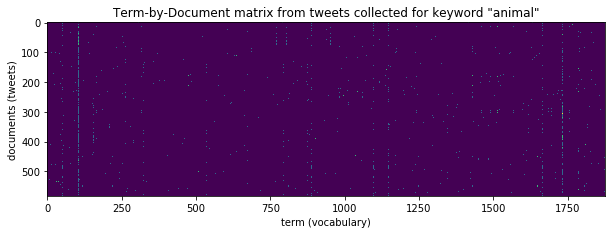

In [31]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for tweets stored 
in k2_tweets_processed
'''
# INSERT YOUR CODE HERE
k2_termdoc, k2_vocab = construct_termdoc(k2_tweets_processed)

'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE
print(' '.join(k2_vocab[:5]))

'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k2_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[1]))

***Instruction 2.11***. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for tweets collected for **second** keyword. Store this distance matrix in the variable named ***k2_euclidean_distances*** and **visualise** this matrix.

[**Total mark: 15**]

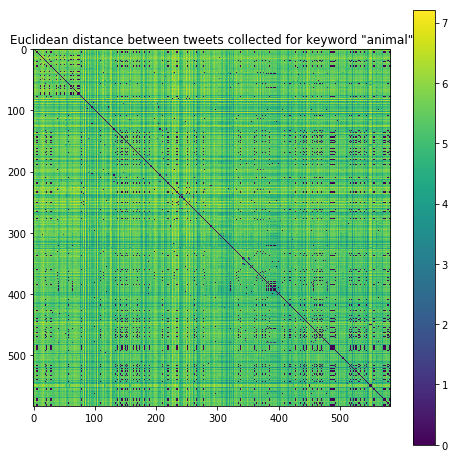

In [32]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# compute the Euclidean distance matrix using compute_euclidean_distance_matrix() function
k2_euclidean_distances = compute_euclidean_distance_matrix(k2_termdoc)

# Visualise the distance matrix for this keyword
# INSERT YOUR CODE HERE

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Euclidean distance between tweets collected for keyword \"{}\"".format(keywords[1]))
cax = ax.imshow(k2_euclidean_distances)
cbar = fig.colorbar(cax)

**Instruction 2.12**. Similarly, your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for tweets stored in ***k3_tweets_processed***, print out the first **5** vocabularies and visualise this term-by-document matrix.

[**Total mark: 9**]

$21 $24 $32 &amp *perfect*


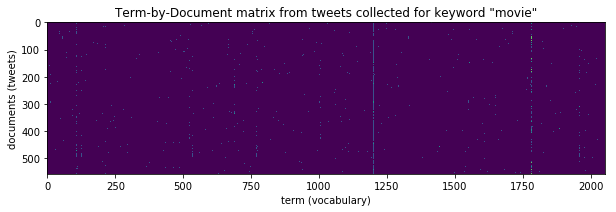

In [33]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for tweets stored 
in k3_tweets_processed
'''
# INSERT YOUR CODE HERE
k3_termdoc, k3_vocab = construct_termdoc(k3_tweets_processed)

'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE
print(' '.join(k3_vocab[:5]))

'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k3_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[2]))

***Instruction 2.13***. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for tweets collected for **third** keyword. Store this distance matrix in the variable named ***k3_euclidean_distances*** and visualise this matrix.

[**Total mark: 12**]

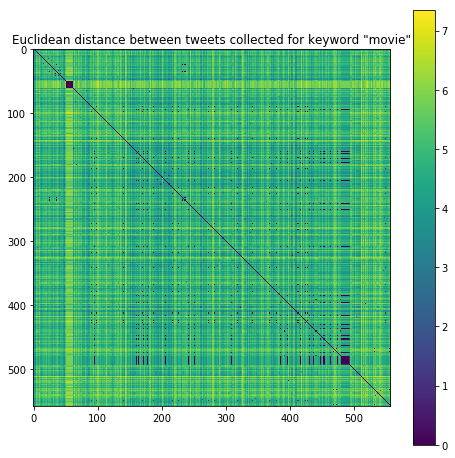

In [34]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# compute the Euclidean distance matrix using compute_euclidean_distance_matrix() function
k3_euclidean_distances = compute_euclidean_distance_matrix(k3_termdoc)

# Visualise the distance matrix for this keyword
# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Euclidean distance between tweets collected for keyword \"{}\"".format(keywords[2]))
cax = ax.imshow(k3_euclidean_distances)
cbar = fig.colorbar(cax)

### Part 2C: Data Clustering

Thus far in this assignment, we have collected tweets for each keyword and analyse them seperately. We have constructed the term-by-document matrix for each collection of tweets seperately. A fundemantal and common task in data science, analytics, machine learning, science and engineering is **clustering**. This is also known as unsupervised learning or exploratory data analysis as we have learned in our classes.

This part of this assignment will use the Kmeans algorithm learned in our classes to cluster the **entire** colllection of tweets collected for **all** keywords. To do so, we need to compute the **distance** between **any** two pair of tweets. This requires us to compute a **joint** term-by-document matrix for all tweets.

The reason that we **cannot** use the individual term-by-document matrices computed earlier (e.g.,***k1_termdoc, k2_termdoc, k3_termdoc***) for this task is because they have different dictionary sizes. Hence, tweets collected for different keywords have been represented by vectors of different dimension. 

The following piece of codes will help you to inspect these dimensions.

In [35]:
print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[0]))
print('{} x {}\n'.format(k1_termdoc.shape[0],k1_termdoc.shape[1]))

print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[1]))
print('{} x {}\n'.format(k2_termdoc.shape[0],k2_termdoc.shape[1]))

print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[2]))
print('{} x {}\n'.format(k3_termdoc.shape[0],k3_termdoc.shape[1]))

Dimension of the term-by-document matrix for keyword "computer":
484 x 2047

Dimension of the term-by-document matrix for keyword "animal":
583 x 1877

Dimension of the term-by-document matrix for keyword "movie":
558 x 2055



**Note**. First, we need to gather all tweets together into a new variable named **all_tweets_processed** using the piece of codes below.

In [36]:
all_tweets_processed = k1_tweets_processed + k2_tweets_processed + k3_tweets_processed

**Instruction 2.14**. Your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for all tweets stored in ***all_tweets_processed***, print out the first 5 vocabularies and visualise this term-by-document matrix.

[**Total marks: 6**]

$100 $130 $14 $16 $21


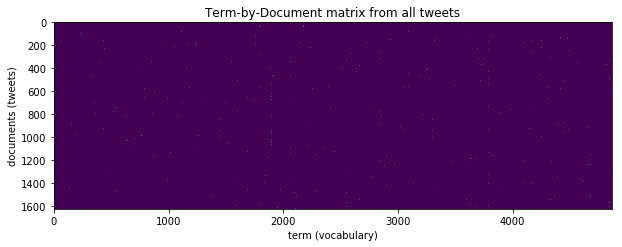

In [37]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for all tweets stored 
in all_tweets_processed
'''
all_termdoc, all_vocab = construct_termdoc(all_tweets_processed)

'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE
print(' '.join(all_vocab[:5]))

'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(all_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from all tweets')

**Instruction 2.15**. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for all tweets collected. Store this distance matrix in the variable named ***all_euclidean_distances*** and visualise this matrix.

[**Total mark: 10**]

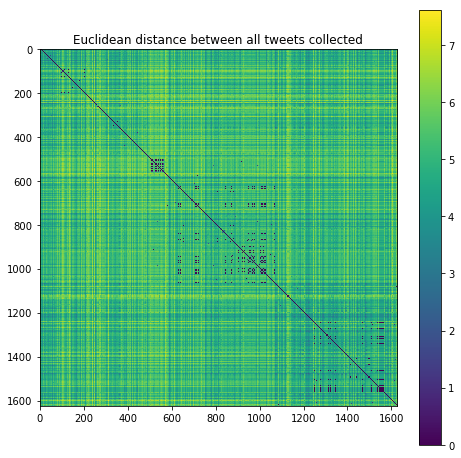

In [38]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# compute the Euclidean distance matrix using compute_euclidean_distance_matrix() function
all_euclidean_distances = compute_euclidean_distance_matrix(all_termdoc)
        
# Visualise the distance matrix for this keyword
# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Euclidean distance between all tweets collected")
cax = ax.imshow(all_euclidean_distances)
cbar = fig.colorbar(cax)

**Note**. Next, we use Kmeans algorithm to cluster all tweets stored in term-by-document matrix ***all_termdoc***. An important requirement for the Kmeans is the specification of the number of clusters which will be specified the variable **n_clusters**.

The following piece of codes will initialise a ***kmeans*** object to be used for subsequent clustering task.

In [39]:
'''
Initialise a kmeans object  from scikit-lean package
'''
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=5, max_iter=300,
                verbose=True, tol=0.00001, random_state=123456)

**Instruction 2.16**. Your task is to use the variable ***kmeans*** to perform clustering on the data stored in the variable ***all_termdoc***.

[**Total mark: 5**]

In [40]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

'''
Use the variable kmeans to perform clustering on the data stored in the variable all_termdoc
Hint: revise the practical session on Kmeans algorithm or check out the documentation from scikit-learn
for Kmeans algorithm.
'''
# INSERT YOUR CODE HERE
kmeans.fit(all_termdoc)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 20729.1371589
start iteration
done sorting
end inner loop
Iteration 1, inertia 20586.9811745
start iteration
done sorting
end inner loop
Iteration 2, inertia 20532.8151222
start iteration
done sorting
end inner loop
Iteration 3, inertia 20517.4709301
start iteration
done sorting
end inner loop
Iteration 4, inertia 20513.2020575
start iteration
done sorting
end inner loop
Iteration 5, inertia 20507.1568073
start iteration
done sorting
end inner loop
Iteration 6, inertia 20504.1405595
start iteration
done sorting
end inner loop
Iteration 7, inertia 20503.9208372
start iteration
done sorting
end inner loop
Iteration 8, inertia 20503.8673563
start iteration
done sorting
end inner loop
Iteration 9, inertia 20503.8111847
start iteration
done sorting
end inner loop
Iteration 10, inertia 20503.8111847
center shift 0.000000e+00 within tolerance 2.721340e-08
Initialization complete
start iteration
done sorti

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=123456, tol=1e-05, verbose=True)

**Instruction 2.17**. Write your codes to print out the cluster centers.

[**Total mark: 5**]

In [41]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to print out the cluster centers.
'''
# INSERT YOUR CODE HERE
print(kmeans.cluster_centers_)

[[  1.30104261e-18   3.25260652e-19   6.50521303e-19 ...,   3.25260652e-19
    3.25260652e-19   3.25260652e-19]
 [  2.65957447e-03   6.64893617e-04   1.32978723e-03 ...,   6.64893617e-04
    6.64893617e-04   6.64893617e-04]
 [  1.30104261e-18   3.25260652e-19   6.50521303e-19 ...,   3.25260652e-19
    3.25260652e-19   3.25260652e-19]]


**Instruction 2.18**. Write your codes to print out the first **1000** cluster labels assigned to the first 1000 tweets.

[**Total marks: 5**]

In [42]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to print out the first **1000** cluster labels assigned to the first 1000 tweets.
'''
# INSERT YOUR CODE HERE
for label in kmeans.labels_[:1000]:
    print(label, end=" ")

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 

**Note**. Next, we would like to obtain the quality of our clustering results. We first obtain the labels of tweets for each keyword.

In [43]:
# compute the number of tweets for each keyword
k1_n_tweets = len(k1_tweets_processed)
k2_n_tweets = len(k2_tweets_processed)
k3_n_tweets = len(k3_tweets_processed)

# obtain the labels of tweets for each keyword
k1_labels = kmeans.labels_[0 : k1_n_tweets]
k2_labels = kmeans.labels_[k1_n_tweets : k1_n_tweets + k2_n_tweets]
k3_labels = kmeans.labels_[k1_n_tweets + k2_n_tweets :]

Then, we examine what is the proprotion of tweets from different keywords (or categories) appear in the **first** cluster. Remember that **0** is the label for the first cluster (**1** for the second and **2** for the third clusters)

The following piece of codes will help us to do so.

[0, 77, 0]


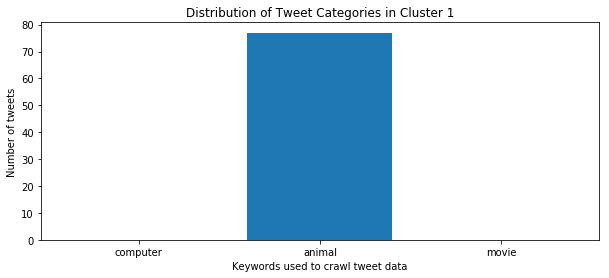

In [44]:
# obtain the list of tweet indices of keyword k1 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k1_labels
k1_idx_label0 = np.where(k1_labels == 0)[0]

# obtain the list of tweet indices of keyword k2 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k2_labels
k2_idx_label0 = np.where(k2_labels == 0)[0]

# obtain the list of tweet indices of keyword k3 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k3_labels
k3_idx_label0 = np.where(k3_labels == 0)[0]

# we then plot a bar chart to visualize this 
fig, ax = plt.subplots(figsize=(10, 4))
cluster1_freq = [len(k1_idx_label0), len(k2_idx_label0), len(k3_idx_label0)]
ax.bar([1,2,3], cluster1_freq,align='center')
plt.xticks([1,2,3],keywords)
plt.xlabel('Keywords used to crawl tweet data')
plt.ylabel('Number of tweets')
plt.title('Distribution of Tweet Categories in Cluster 1')
print(cluster1_freq)

**Instruction 2.19**. Similarly, write your codes to compute the the proprotion of tweets from different keywords (or categories) appear in the **second** cluster and plot a bar chart visualise this information.

[**Total mark: 8**]

[484, 462, 558]


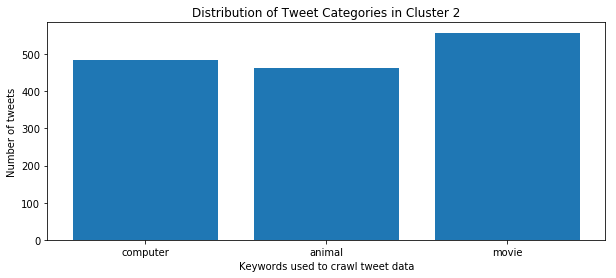

In [45]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# obtain the list of tweet indices of keyword k1 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k1_labels
k1_idx_label1 = np.where(k1_labels == 1)[0]

# obtain the list of tweet indices of keyword k2 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k2_labels
k2_idx_label1 = np.where(k2_labels == 1)[0]

# obtain the list of tweet indices of keyword k3 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k3_labels
k3_idx_label1 = np.where(k3_labels == 1)[0]

# Plot a bar chart to visualize this information
# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(10, 4))
cluster2_freq = [len(k1_idx_label1), len(k2_idx_label1), len(k3_idx_label1)]
ax.bar([1, 2, 3], cluster2_freq, align='center')
plt.xticks([1, 2, 3], keywords)
plt.xlabel('Keywords used to crawl tweet data')
plt.ylabel('Number of tweets')
plt.title('Distribution of Tweet Categories in Cluster 2')
print(cluster2_freq)

**Instruction 2.20**. Similarly, write your codes to compute the the proprotion of tweets from different keywords (or categories) appear in the **third** cluster and plot a bar chart visualise this information.

[**Total mark: 8**]

[0, 44, 0]


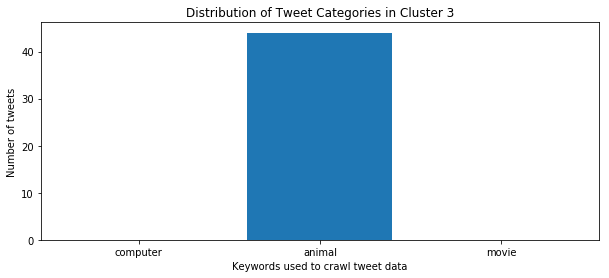

In [46]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# obtain the list of tweet indices of keyword k1 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k1_labels
k1_idx_label2 = np.where(k1_labels == 2)[0]

# obtain the list of tweet indices of keyword k2 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k2_labels
k2_idx_label2 = np.where(k2_labels == 2)[0]

# obtain the list of tweet indices of keyword k3 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k3_labels
k3_idx_label2 = np.where(k3_labels == 2)[0]

# Plot a bar chart to visualize this information
# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(10, 4))
cluster3_freq = [len(k1_idx_label2), len(k2_idx_label2), len(k3_idx_label2)]
ax.bar([1, 2, 3], cluster3_freq, align='center')
plt.xticks([1, 2, 3], keywords)
plt.xlabel('Keywords used to crawl tweet data')
plt.ylabel('Number of tweets')
plt.title('Distribution of Tweet Categories in Cluster 3')
print(cluster3_freq)

### END OF ASSIGNMENT 2 NOTEBOOK

----